In [1]:
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [2]:
import pandas as pd

df = pd.read_csv("IMDb Movies India.csv")

df.head()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte

In [3]:
import pandas as pd

# Try using the ISO-8859-1 (Latin-1) encoding
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

# Display first few rows
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [5]:
data = df[['Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']].copy()

# Drop missing values
data = data.dropna()
data.head()


,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating
1,109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0
3,110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.4
5,147 min,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.7
6,142 min,"Drama, Romance, War","1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.4
8,82 min,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data[col] = le.fit_transform(data[col])


In [7]:
X = data[['Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: '143 min'

In [10]:
# Clean 'Duration' column by removing 'min' and converting to numeric
data['Duration'] = data['Duration'].str.replace('min', '').astype(str).str.strip()
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Drop rows with missing duration values (if any)
data = data.dropna(subset=['Duration'])


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


ValueError: could not convert string to float: '159 min'

In [12]:
# Ensure Duration column is properly numeric
data['Duration'] = (
    data['Duration']
    .astype(str)                # Convert everything to string
    .str.extract('(\d+)')       # Extract only digits (e.g., "159" from "159 min")
    .astype(float)              # Convert to float
)

# Drop rows where Duration is missing
data = data.dropna(subset=['Duration'])


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1564465879.py:5: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')       # Extract only digits (e.g., "159" from "159 min")


In [13]:
X = data[['Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: '4,114'

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


ValueError: could not convert string to float: '4,960'

In [15]:
# --- Clean 'Duration' column ---
data['Duration'] = (
    data['Duration']
    .astype(str)
    .str.extract('(\d+)')      # Extract only digits
    .astype(float)
)

# --- Clean 'Votes' column ---
data['Votes'] = (
    data['Votes']
    .astype(str)
    .str.replace(',', '', regex=True)  # Remove commas
    .astype(float)
)

# Drop any rows where these are missing
data = data.dropna(subset=['Duration', 'Votes'])


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4073765200.py:5: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')      # Extract only digits


In [16]:
X = data[['Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1.089706381013898
Mean Squared Error: 1.7740498999139704
R² Score: 0.0419570745548572


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R²:", r2_score(y_test, rf_pred))


Random Forest Results:
MAE: 0.9742177561837455
MSE: 1.5235922811395761
R²: 0.17721209179100195


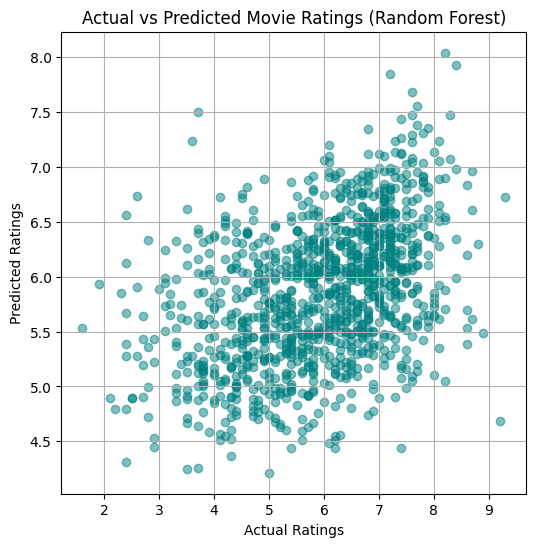

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings (Random Forest)")
plt.grid(True)
plt.show()
